In [1]:
!pip install rioxarray
import xarray as xr
import rioxarray 
from pathlib import Path
import pandas as pd
import numpy as np
import random

In [2]:

def get_bounding_box_max_min_lat_long_values(country_name, df_bounding_boxes):
    # Get min of lat and long for the country
    min_long = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['longmin']
    min_lat = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['latmin']
    # Get max of lat and long for the country
    max_long = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['longmax']
    max_lat = df_bounding_boxes[df_bounding_boxes['country'] == country_name]['latmax']
    return  min_long, min_lat, max_long, max_lat

def get_location_names():
    df_bounding_boxes = pd.read_csv('/Users/kevinha/VYPREarth/country-boundingboxes.csv')
    country_names_list = df_bounding_boxes['country'].to_list()
    return country_names_list, df_bounding_boxes

def get_clipped_xarray_dataset(ds, country_name, df_bounding_boxes):
    # CRS code 
    dsc = ds.rio.write_crs(4326) # Need to specify this as Ilektra mentioned 
    
    # Get min of lat and long for the country  and  max of lat and long for the country
    min_long, min_lat, max_long, max_lat = get_bounding_box_max_min_lat_long_values(country_name, df_bounding_boxes)
    
    # Clip the dataset
    ds_clipped = dsc.rio.clip_box(minx= min_long, miny= min_lat, maxx= max_long,maxy= max_lat)
    
    return ds_clipped 


In [3]:
dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')

# Get the list of countries 
country_names_list, df_bounding_boxes = get_location_names()


/var/folders/fd/c30byq417d3dh1ystdk504100000gp/T/ipykernel_853/1674398800.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  dataset=xr.open_zarr('/Users/kevinha/Downloads/seasfirecube.zarr')


In [4]:
ds_clipped = get_clipped_xarray_dataset(dataset, 'Niger', df_bounding_boxes)

In [5]:
ds_clipped

<xarray.Dataset>
Dimensions:             (latitude: 98, longitude: 80, time: 966)
Coordinates:
  * latitude            (latitude) float64 25.88 25.62 25.38 ... 1.875 1.625
  * longitude           (longitude) float64 0.125 0.375 0.625 ... 19.62 19.88
  * time                (time) datetime64[ns] 2001-01-01T12:00:00 ... 2021-12...
    spatial_ref         int64 0
Data variables: (12/35)
    BAs_GWIS            (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>
    BurntArea           (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>
    FCCI_BA             (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>
    FCD_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>
    FRP_emissions       (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>
    LST_Day_CMG         (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>
    ...                  ...
    t2mmax              (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>
    t2mmin              (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>
    tp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>
    vpd_cf              (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>
    wp                  (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>
    ws10                (time, latitude, longitude) float32 dask.array<chunksize=(966, 98, 80), meta=np.ndarray>

In [6]:
ds_clipped.dims

Frozen({'latitude': 98, 'longitude': 80, 'time': 966})

In [7]:
#image_dataset=ds_clipped.sel(cols=['LST_Day_CMG','NDVI','mslp','ssr','t2mmin','tp','vpd_cf','BurntArea'])

In [8]:
image_dataset = np.array(ds_clipped.to_array())

In [9]:
image_dataset.shape

(35, 966, 98, 80)

In [10]:
print(image_dataset.dtype.names)

None


In [11]:
image_number=random.randint(0,len(image_dataset))

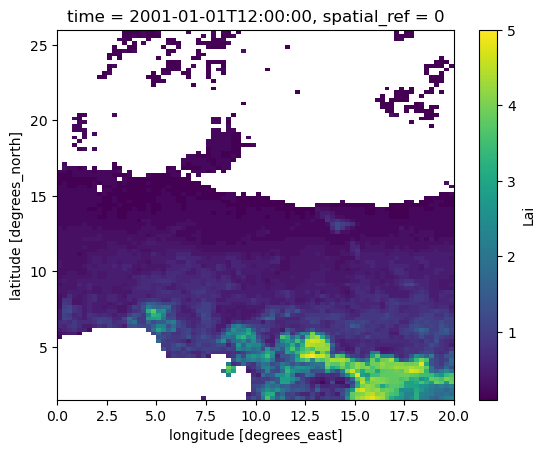

In [12]:
ds_clipped['Lai'].isel(time=0).plot()

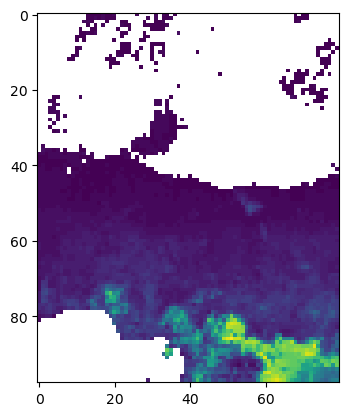

In [13]:

from matplotlib import pyplot as plt
plt.imshow(image_dataset[6][0])

In [14]:
image_dataset=image_dataset[[1,5,7,15,24,27,30,21,32]]

In [15]:
image_dataset.shape

(9, 966, 98, 80)

In [16]:
#burntarea:1 , lst=5, ndvi=7, mslp: 15, ssr: 24, ssv1: 27, t2min:30, tp: 31, vpd_cf:32


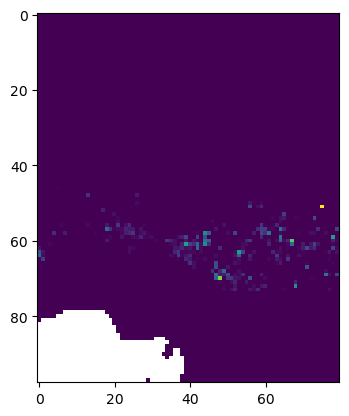

In [17]:
plt.imshow(image_dataset[0][7])

In [18]:
images=[]
masks=[]
for i in range(0, 966):
    if(i%2==0):
        images.append(image_dataset[:,i,:,:])
    else:
        masks.append(image_dataset[:,i,:,:])
                    

In [19]:
images=np.asarray(images)

In [20]:
images.shape

(483, 9, 98, 80)

In [21]:
masks=np.asarray(images)
masks.shape

(483, 9, 98, 80)

In [22]:
deletes=[]
for i in range(0,483):
    ba=False
    for j in range(0,98):
        for k in range(0,80):
            if(images[i][0][j][k]>0):
                ba=True
    if ba==False:
        deletes.append(i)
        print(i)

11
12
13
14
60
129
150
151
219
220
265
266
267
290
313
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482


In [23]:
images=np.delete(images, deletes, 0)


In [24]:
images.shape

(330, 9, 98, 80)

In [25]:
masks=np.delete(masks, deletes,0)
masks.shape

(330, 9, 98, 80)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images[:,0,:,:], masks[:,0,:,:], test_size = 0.20, random_state = 42)

In [53]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
!pip install tensorflow
!pip install keras
!pip install -U --pre segmentation-models

In [54]:
import segmentation_models as sm


In [55]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)

# load your data
x_train, x_val,y_train, y_val = train_test_split(images, masks, test_size = 0.20, random_state = 42)

# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

# define model
model = Unet(BACKBONE, encoder_weights='imagenet')
model.compile('Adam', loss=bce_jaccard_loss, metrics=[iou_score])

# fit model
model.fit(
    x=x_train,
    y=y_train,
    batch_size=16,
    epochs=100,
    validation_data=(x_val, y_val),
)

Epoch 1/100


ValueError: in user code:

    File "/Users/kevinha/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/kevinha/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kevinha/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/kevinha/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/Users/kevinha/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/kevinha/anaconda3/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_7" is incompatible with the layer: expected shape=(None, None, None, 3), found shape=(None, 9, 98, 80)
